In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [2]:
# Read the list of filenames from the configuration file
with open('../file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = f"../data/{file}"
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])
data['date'] = pd.to_datetime(data['date'])

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data["user"] = data["user"].replace("Banties1g", "banties_x")
data["user"] = data["user"].replace("banties1g", "banties_x")
data["user"] = data["user"].replace("fyodor_m_d1821", "fyredoor4")
data["user"] = data["user"].replace("chili_poe", "chili_con_bacon")
data["user"] = data["user"].replace("Wirelesss_", "W1r3lesss")
data["user"] = data["user"].replace("treklul", "trek44_")
data["user"] = data["user"].replace("ttrek_", "trek44_")
data["user"] = data["user"].replace("TriplesingleJ", "TripleSingleJames")
data["user"] = data["user"].replace("uuccugr", "uwu_cougar")


In [3]:
# Extract all unique users from the other streams as a reference
#reference_users = set(data[data["stream"] != 302]["user"].unique())
# Extract users from stream 302
#stream_302_users = data[data["stream"] == 302]["user"]
# Create a mapping of lowercase to correct capitalization using the reference data
#user_mapping = {user.lower(): user for user in reference_users}
# Fix capitalization for users in stream 302
#fixed_users = stream_302_users.apply(lambda x: user_mapping.get(x.lower(), x))
# Count how many users needed to be fixed
#fix_count = (stream_302_users != fixed_users).sum()
# Update the data with fixed users
#data.loc[data["stream"] == 302, "user"] = fixed_users

In [4]:
# Find the first stream where each user sent a message
first_stream_df = data.groupby("user")["stream"].min().reset_index()
first_stream_df.rename(columns={"stream": "first_stream"}, inplace=True)

In [5]:
# Merge with the original DataFrame
data = data.merge(first_stream_df, on="user", how="left")
data.tail(10)

,date,user,message,stream,first_stream
1698437,2025-05-02 14:51:50 UTC,darkness_0_,bye KEKW,307,207
1698438,2025-05-02 14:51:50 UTC,cringeuss,bb,307,218
1698439,2025-05-02 14:51:50 UTC,Prearcical,bye bye,307,243
1698440,2025-05-02 14:51:53 UTC,mk62447,bye,307,305
1698441,2025-05-02 14:51:54 UTC,neshpinat,bye,307,262
1698442,2025-05-02 14:51:55 UTC,hellrazor_0,bye,307,255
1698443,2025-05-02 14:51:55 UTC,lajosbarnabas,bye bye,307,0
1698444,2025-05-02 14:51:56 UTC,blomsteryo,bye bye,307,297
1698445,2025-05-02 14:51:57 UTC,Martin_Gales,bye bye,307,0
1698446,2025-05-02 14:51:57 UTC,JackMikelitingof1756,GoodBye bye,307,307


In [6]:
# Count occurrences of first_stream for each stream
pivot_table = data.groupby(["stream", "first_stream"]).size().unstack(fill_value=0)

# Reset index for better readability
pivot_table = pivot_table.reset_index()

In [7]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Columns: 309 entries, stream to 307
dtypes: int64(309)
memory usage: 743.7 KB


In [8]:
pivot_table = pivot_table.drop(columns=['stream'])

In [9]:
pivot_table

first_stream,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,1985,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2105,941,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2150,204,400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1788,87,103,397,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1842,87,102,80,344,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,945,6,10,0,0,100,0,113,0,138,...,53,76,76,18,50,766,0,0,0,0
304,1155,27,36,1,0,184,0,41,0,90,...,39,54,97,50,50,244,834,0,0,0
305,502,48,42,2,0,2,7,1,0,32,...,32,11,51,19,15,21,57,530,0,0
306,1159,244,42,24,2,282,7,122,0,61,...,140,72,96,91,20,105,73,209,864,0


In [10]:
# Convert 'date' to datetime format and extract the month for color mapping
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

# Get the month for each stream
stream_months = data.groupby('stream')['month'].first()

# Get the month for each stream
stream_months = data.groupby("stream")["month"].first()

# Define base colors for each month
base_color_map = {
    1: '#008B8B',  # Dark Cyan
    2: '#FF8C00',  # Dark Orange
    3: '#006400',  # Dark Green
    4: '#8B0000',  # Dark Red
    5: '#450145',  # Dark Purple
    6: '#00008B',  # Dark Blue
    7: '#808000',  # Olive
    8: '#006400',  # Dark Green
    9: '#8B4513',  # SaddleBrown
    10: '#a10202',  # Deep Red
    11: '#242323',  # Dark Gray
    12: '#730049'  # Dark Magenta
}

# Function to generate shades for each month color
def generate_shades(base_color, n_shades, lightness_factor=0.7):
    color = mcolors.to_rgba(base_color)
    light_color = [1 - (1 - c) * (1 - lightness_factor) for c in color]  # Generate a lighter color
    cmap = mcolors.LinearSegmentedColormap.from_list(
        f'shades_of_{base_color}', [color, light_color], N=n_shades)
    return [cmap(i) for i in range(n_shades)]

# Create a color mapping for each stream based on the month
color_list = []
for month in stream_months.unique():
    month_streams = stream_months[stream_months == month].index
    n_streams_in_month = len(month_streams)
    base_color = base_color_map.get(month, "#808080")  # Default gray if month is missing

    # Generate shades
    shades = generate_shades(base_color, n_streams_in_month) if n_streams_in_month > 1 else [base_color]

    # Assign shades to streams
    for i, stream in enumerate(month_streams):
        color_list.append((stream, shades[i]))

# Convert to dictionary for easy lookup
color_dict = dict(color_list)

# Ensure colors match pivot table index
sorted_color_list = [color_dict[stream] for stream in pivot_table.index]

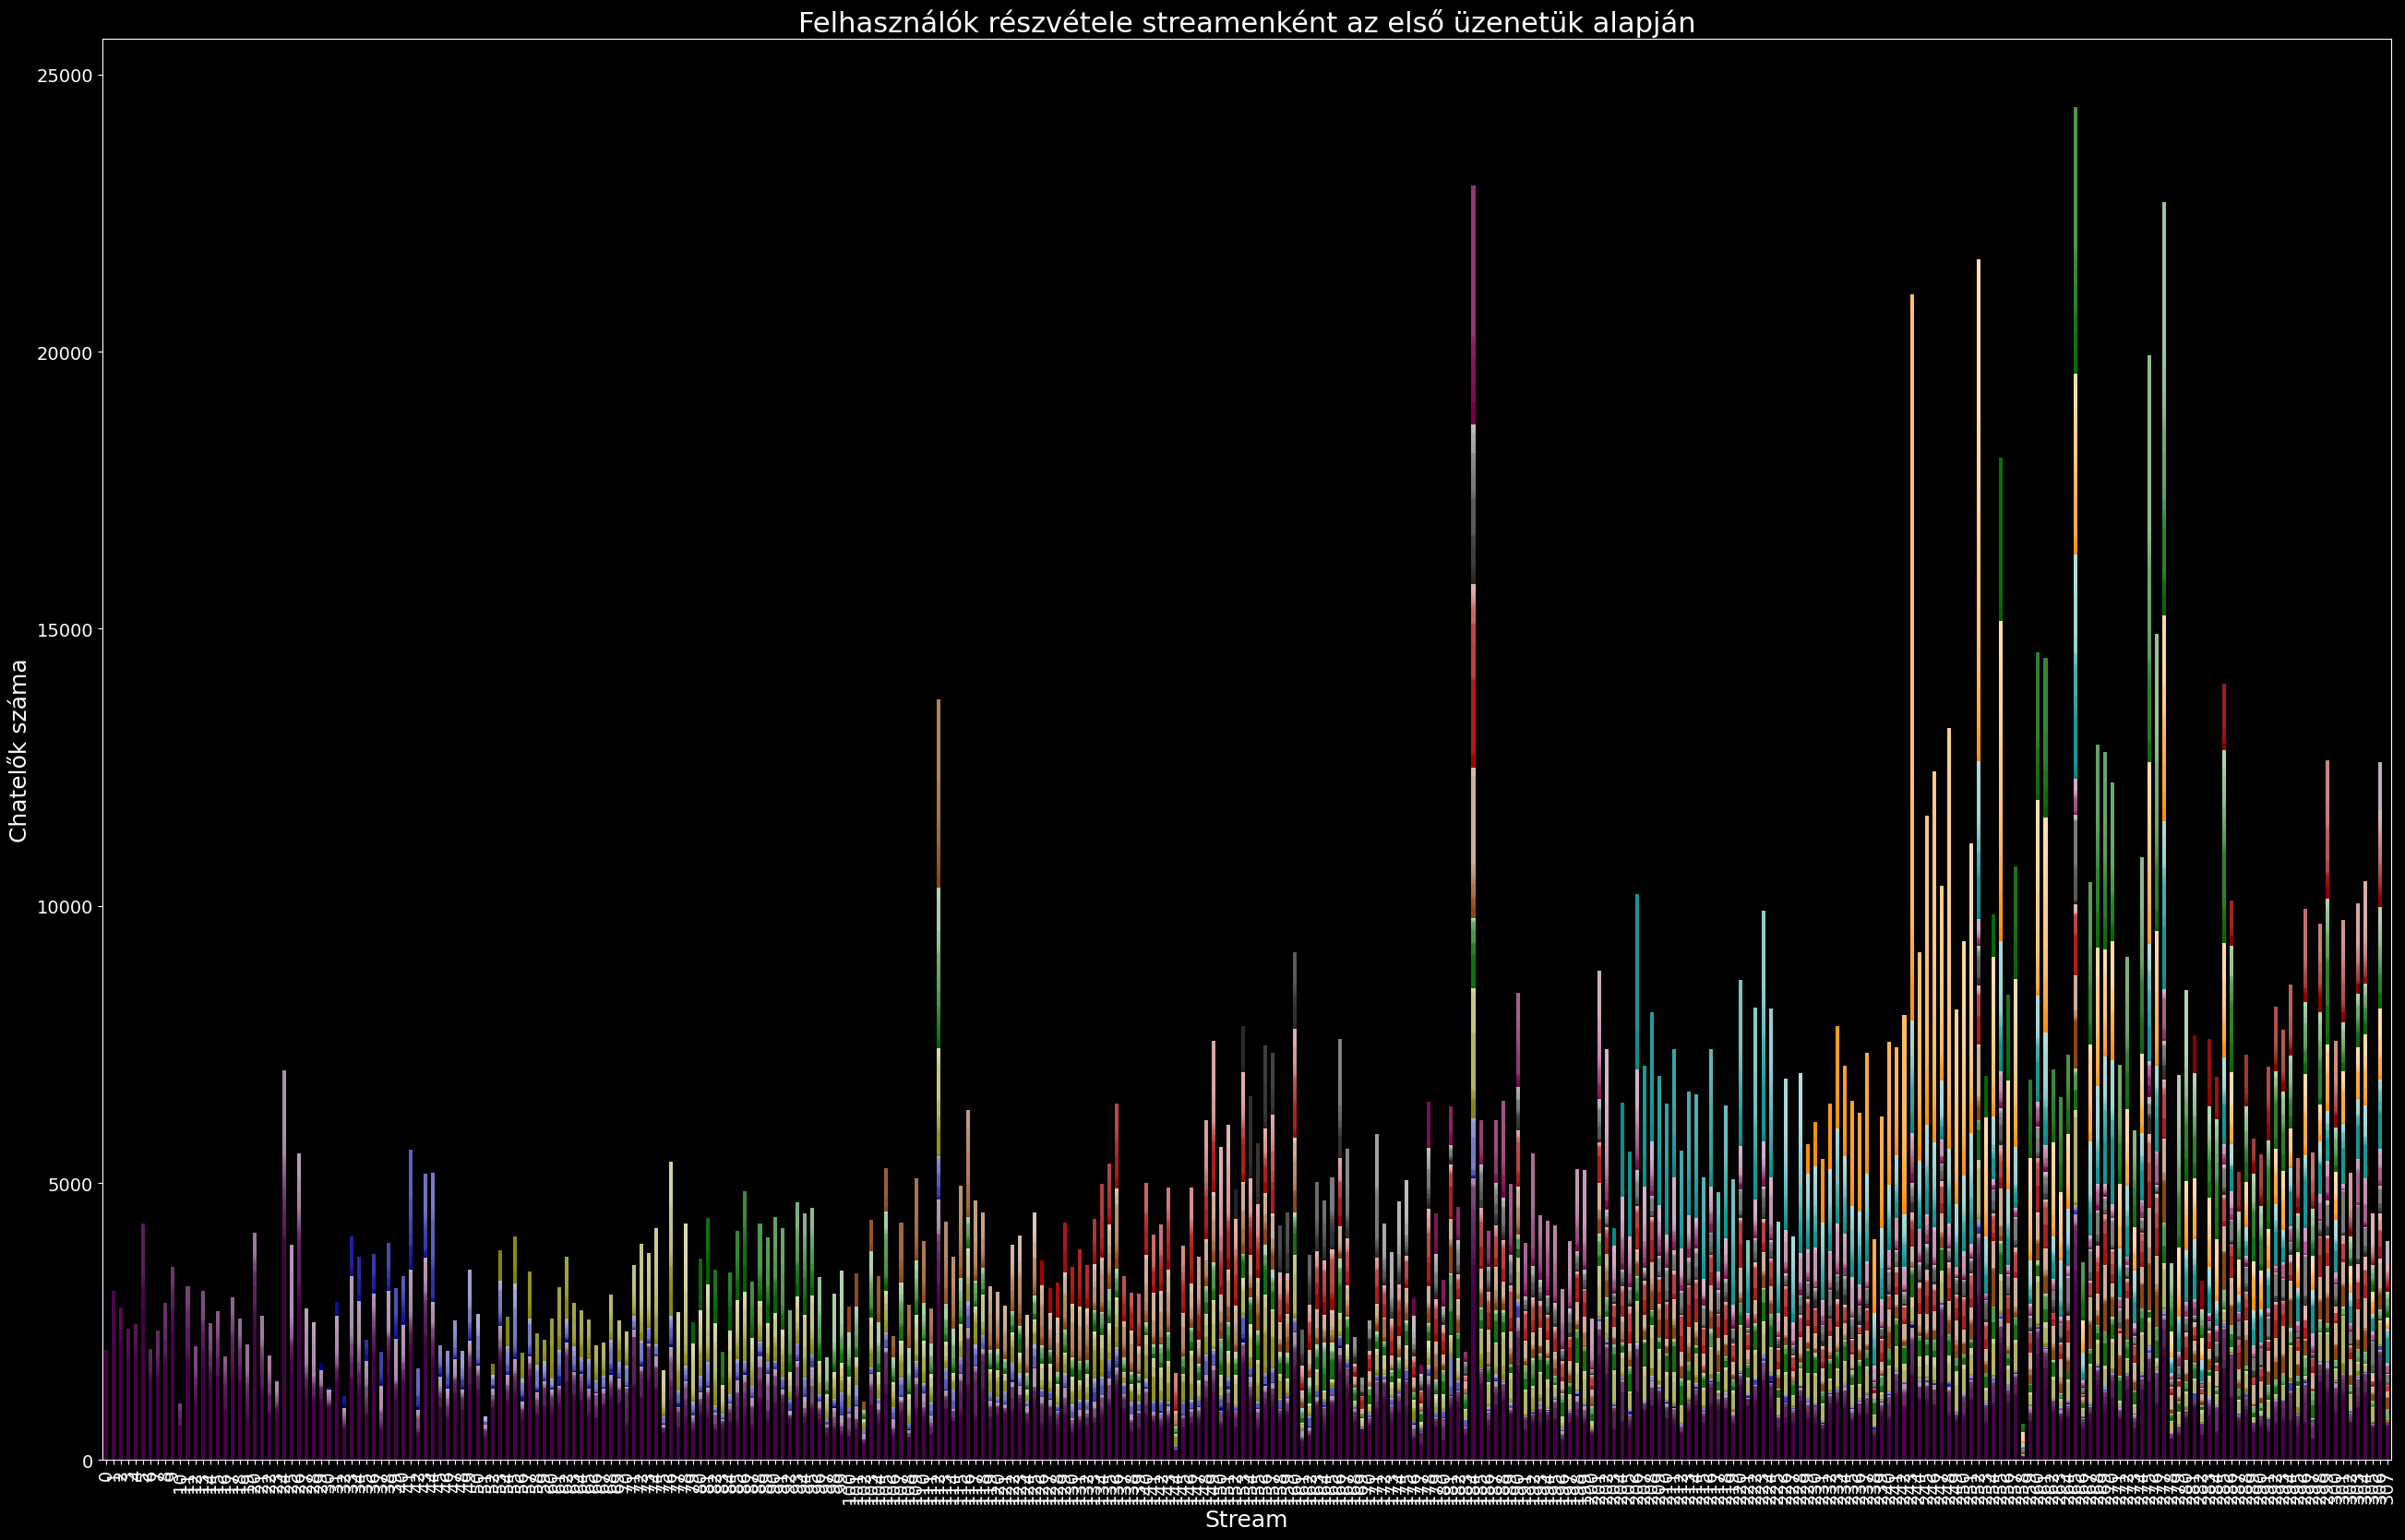

In [11]:
# Plot stacked bar chart
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(32, 20))

pivot_table.plot(kind='bar', stacked=True, ax=ax, color=sorted_color_list, legend=False)

plt.title('Felhasználók részvétele streamenként az első üzenetük alapján', fontsize=22)
plt.xlabel('Stream', fontsize=18)
plt.ylabel('Chatelők száma', fontsize=18)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [12]:
# Convert pivot table values to percentages (row-wise normalization)
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


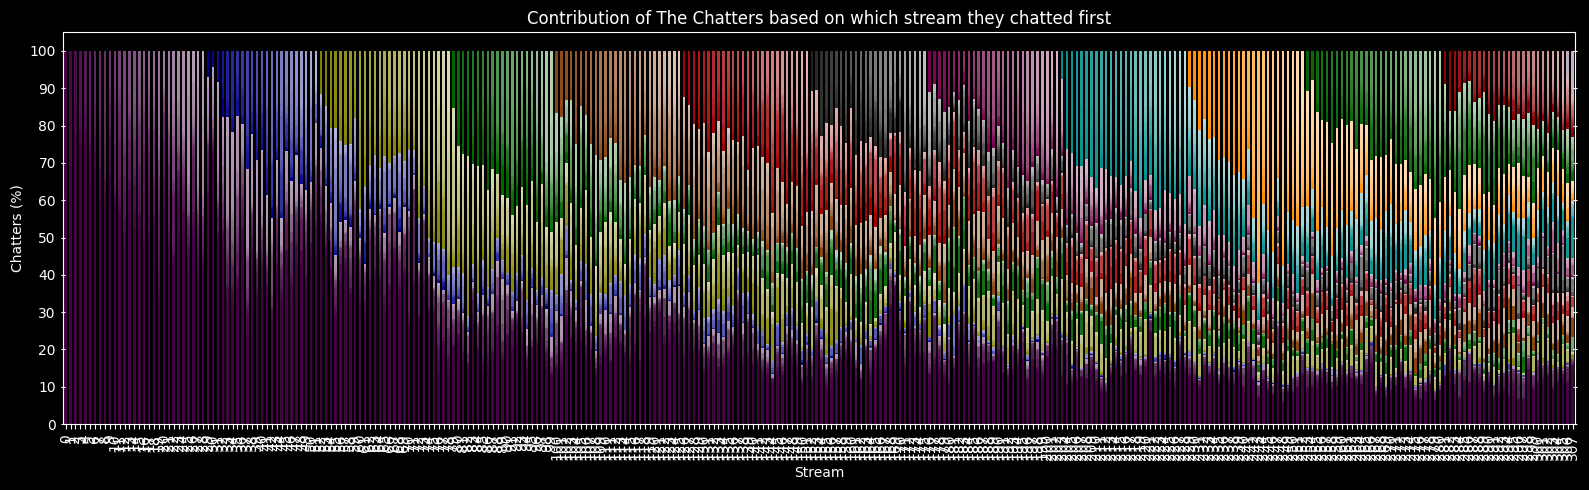

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the percentage data
plt.style.use('dark_background')
ax = pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(16, 5), color=sorted_color_list, legend=False)

plt.title('Contribution of The Chatters based on which stream they chatted first')

# Adjust x and y labels
plt.xlabel('Stream', fontsize=10)  # Make x-axis label smaller
plt.ylabel('Chatters (%)')

# Adjust y-axis ticks to show every 10
plt.yticks(np.arange(0, 101, 10))  

# Show y-axis ticks on both left and right
ax.yaxis.set_ticks_position('both')  
ax.tick_params(axis='y', direction='inout')

plt.tight_layout()
plt.show()

In [14]:
pivot_table_percentage

first_stream,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1,69.107026,30.892974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,78.068264,7.407407,14.524328,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
3,75.284211,3.663158,4.336842,16.715789,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,75.030550,3.543788,4.154786,3.258656,14.012220,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,9.401114,0.059690,0.099483,0.000000,0.000000,0.994827,0.000000,1.124154,0.0,1.372861,...,0.527258,0.756068,0.756068,0.179069,0.497413,7.620374,0.000000,0.000000,0.000000,0.0000
304,11.053689,0.258398,0.344531,0.009570,0.000000,1.760934,0.000000,0.392382,0.0,0.861326,...,0.373241,0.516796,0.928318,0.478515,0.478515,2.335152,7.981625,0.000000,0.000000,0.0000
305,11.270768,1.077683,0.942973,0.044903,0.000000,0.044903,0.157162,0.022452,0.0,0.718455,...,0.718455,0.246969,1.145038,0.426583,0.336776,0.471486,1.279749,11.899416,0.000000,0.0000
306,9.202064,1.937277,0.333466,0.190552,0.015879,2.238984,0.055578,0.968638,0.0,0.484319,...,1.111552,0.571655,0.762207,0.722509,0.158793,0.833664,0.579595,1.659389,6.859865,0.0000


In [15]:
#pivot_table.to_excel('your_excel_file.xlsx', sheet_name='Pivot Table')